# Taller 3

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller3.ipynb, con su primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en google colab** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Jueves 18 de Mayo 11:59 pm**

## Librerias

In [6]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate
import sympy as sym
from sympy import symbols
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as ani
plt.style.use('dark_background')

In [3]:
from matplotlib import rc
rc("animation", html = "jshtml")
sym.init_printing()
#matplotlib.rcParams['animation.embed_limit'] = 2**128

# Problema 1

El siguiente codigo de C++ se obtienen los puntos de un tiro parabólico con los siguientes parametros, 

$x_0 = 0\text{ m }$,
$y_0 = 10\text{ m }$,
$v_{x0} = 10\text{ m/s }$,
$v_{y0} = 10\text{ m }$,
$t_f = 2.733 \text{ s }$, 
$dt = 0.01 \text{ s }$

y tomando gravedad como, 

$g = 10 \text{ m/s }^2$

Además el código en python, y el script gráfican en matplotlib estos puntos, 

problema: Modificar el código de `C++` para incluir un tiro parabólico con fricción del aire y con las mismas condiciones iniciales usando el método de Runge-Kutta de 4to orden, al final debe gráficar el tiro parabólico normal y el tiro parabólico con fricción en la misma gráfica. 

Tome el coeficiente de fricción del aire y la masa como se definen en el archivo de C++.

$b = 0.2 \text{ kg/s }$,
$m = 1 \text{ kg }$.

El método de Runge-Kutta para ecuaciones diferenciales de segundo orden tiene la forma, 

 ![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/runge%20kutta%202nd%20order.png)


In [74]:
%%writefile parabolico.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <cmath>
#define g 10.0
#define m 1
#define b 0.2

using namespace std;
    


double vxfunc(double v)  {
    double vdot;
    vdot=(-b/m)*v;
    return vdot;
}


double vyfunc (double v) {
    double vdot;
    vdot=(-b/m)*v-g;
    return vdot;
}


int main() {
    double x_init = 0;
    double y_init = 10;
    double vx_init = 10;
    double vy_init = 10;

    double dt = 0.01;
    double t_total = 2.733;
    cout << "total_time:" <<  t_total << endl;
    int N = t_total/dt;
    cout << N;
    
    double pos_x[N];
    double pos_y[N];

    for(int i = 0; i <N; i++){
        pos_x[i] = vx_init*i*dt;
        pos_y[i] = y_init + vy_init*i*dt - 0.5*g*pow(i*dt, 2);     
    }

    for(int i = 0; i <N; i++){
        cout << pos_x[i] << " ";
        cout << pos_y[i] << " ";
    }
    
    std::ofstream myfile;
    myfile.open ("x_values.csv");
    myfile << "x,y\n";
    for(int i = 0; i <N; i++){
        myfile << pos_x[i] << ",";
        myfile << pos_y[i] << "\n";
    }
    myfile.close();

    // su codigo aqui

    t_total = 2.85;
    N = t_total/dt;



    // Implementacion Runge Kutta


    double pos_xb[N];
    double pos_yb[N];
    double vel_xb[N];
    double vel_yb[N];

    pos_xb[0]=x_init;
    pos_yb[0]=y_init;
    vel_xb[0]=vx_init;
    vel_yb[0]=vy_init;

    double h=dt;
    double l1;
    double l2;
    double l3;
    double l4;
    double k1;
    double k2;
    double k3;
    double k4;
    

    for (int i = 0; i<N; i++){
        
        l1=h*vxfunc(vel_xb[i]);
        l2=h*vxfunc(vel_xb[i]+0.5*l1);
        l3=h*vxfunc(vel_xb[i]+0.5*l2);
        l4=h*vxfunc(vel_xb[i]+l3);

        

        
        vel_xb[i+1]=vel_xb[i]+(0.16)*(l1+2*l2+2*l3+l4);

        

        k1=h*vel_xb[i];
        k2=h*(vel_xb[i]+0.5*l1);
        k3=h*(vel_xb[i]+0.5*l2);
        k4=h*(vel_xb[i]+l3);
        
        pos_xb[i+1]=pos_xb[i]+(0.16)*(k1+2*k2+2*k3+k4);

        l1=h*vyfunc(vel_yb[i]);
        l2=h*vyfunc(vel_yb[i]+0.5*l1);
        l3=h*vyfunc(vel_yb[i]+0.5*l2);
        l4=h*vyfunc(vel_yb[i]+l3);

        vel_yb[i+1]=vel_yb[i]+(0.16)*(l1+2*l2+2*l3+l4);

        k1=h*vel_yb[i];
        k2=h*(vel_yb[i]+0.5*l1);
        k3=h*(vel_yb[i]+0.5*l2);
        k4=h*(vel_yb[i]+l3);
        
        pos_yb[i+1]=pos_yb[i]+(0.16)*(k1+2*k2+2*k3+k4);
        
    }

    std::ofstream myfileb;
    myfileb.open ("x_values_damped.csv");
    myfileb << "x,y\n";
    for(int i = 0; i <N; i++){
        myfileb << pos_xb[i] << ",";
        myfileb << pos_yb[i] << "\n";
    }
    myfileb.close();


    return 0;
}

Overwriting parabolico.cpp


In [75]:
%%script bash

g++ parabolico.cpp -o parabolico
./parabolico

total_time:2.733
2730 10 0.1 10.0995 0.2 10.198 0.3 10.2955 0.4 10.392 0.5 10.4875 0.6 10.582 0.7 10.6755 0.8 10.768 0.9 10.8595 1 10.95 1.1 11.0395 1.2 11.128 1.3 11.2155 1.4 11.302 1.5 11.3875 1.6 11.472 1.7 11.5555 1.8 11.638 1.9 11.7195 2 11.8 2.1 11.8795 2.2 11.958 2.3 12.0355 2.4 12.112 2.5 12.1875 2.6 12.262 2.7 12.3355 2.8 12.408 2.9 12.4795 3 12.55 3.1 12.6195 3.2 12.688 3.3 12.7555 3.4 12.822 3.5 12.8875 3.6 12.952 3.7 13.0155 3.8 13.078 3.9 13.1395 4 13.2 4.1 13.2595 4.2 13.318 4.3 13.3755 4.4 13.432 4.5 13.4875 4.6 13.542 4.7 13.5955 4.8 13.648 4.9 13.6995 5 13.75 5.1 13.7995 5.2 13.848 5.3 13.8955 5.4 13.942 5.5 13.9875 5.6 14.032 5.7 14.0755 5.8 14.118 5.9 14.1595 6 14.2 6.1 14.2395 6.2 14.278 6.3 14.3155 6.4 14.352 6.5 14.3875 6.6 14.422 6.7 14.4555 6.8 14.488 6.9 14.5195 7 14.55 7.1 14.5795 7.2 14.608 7.3 14.6355 7.4 14.662 7.5 14.6875 7.6 14.712 7.7 14.7355 7.8 14.758 7.9 14.7795 8 14.8 8.1 14.8195 8.2 14.838 8.3 14.8555 8.4 14.872 8.5 14.8875 8.6 14.902 8.7 14.9155 8.

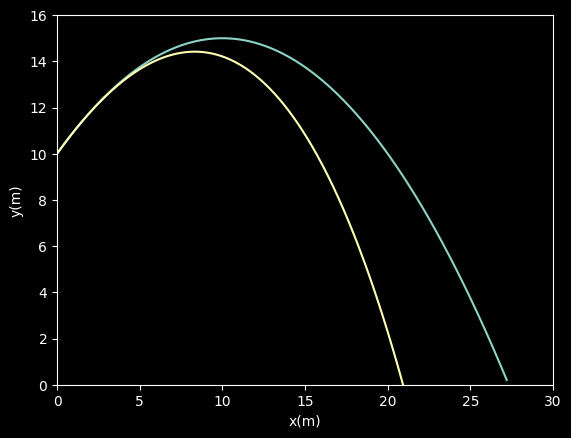

In [76]:
df = pd.read_csv("./x_values.csv")
df_damped = pd.read_csv("./x_values_damped.csv")
x = np.array(df["x"])
y = np.array(df["y"])
x_damped = np.array(df_damped["x"])
y_damped = np.array(df_damped["y"])


plt.ylim([0, 16])
plt.xlim([0, 30])
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.plot(x, y)
plt.plot(x_damped, y_damped)
plt.show()

In [ ]:
%%script bash

rm parabolico x_values.csv

## Problema 2

Considere el sistema resorte pendulo que se muestra en la figura, el resorte está atado a una masa $m_1$ y el pendulo a una masa $m_2$, considere $l_0$ la longitud sin estirar del resorte, y $l$ la longitud del pendulo. El resorte con la masa $m_1$ se mueve en la dirección $x$ sin fricción.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/image2_p2.png)

a) Demuestre que las ecuaciones de Newton y de ligadura del sistema resorte-pendulo son las siguientes, considerando la posición de la masa unida al resorte $x_1 = 0$ cuando el resorte está sin estirar, 

\begin{align}	
m_1 \ddot x_1 &= - k x_1 + T \sin \theta \\
m_2 \ddot x_2 &= - T \sin \theta \\
m_2 \ddot y_2 &=  T \cos \theta - m_2g \\
\ddot x_2 &= \ddot x_1 - \dot\theta^2 l \sin \theta + \ddot\theta l \cos \theta \\
\ddot y_2 &= \dot\theta^2 l \cos \theta + \ddot\theta l \sin \theta\\
\end{align}

Sus ecuaciones aquí,

Para empezar, se define la dirección positiva del eje $y$ como la dirección opuesta a la gravedad. También, se define el sistema de coordenadas de tal modo que $y_1=0$, por conveniencia. Así, para la masa 1 (en $x$):
\begin{equation}
    \sum F_x^{(m_1)}=\boxed{-kx_1+Tsin\theta = m_1 \ddot{x_1}},
\end{equation}
mientras que para la masa 2 (en $x$ y $y$):
\begin{equation}
    \sum F_x^{(m_2)}=\boxed{-Tsin\theta = m_2 \ddot{x_2}}
\end{equation}
y
\begin{equation}
    \sum F_y^{(m_2)}=\boxed{Tcos\theta -m_2g =m_2 \ddot{y_2}}.
\end{equation}

Del diagrama es evidente que se tienen las relaciones
\begin{equation}
    x_2=x_1+\ell sin\theta
\end{equation}
y
\begin{equation}
    y_2=-\ell cos\theta.
\end{equation}

Al tomar la segunda derivada de primera ecuación de ligadura, se obtiene que:
\begin{equation}
    \ddot{x_2}=\ddot{x_1}+\ell \frac{d^2}{dt^2}(sin\theta),
\end{equation}
pero 
\begin{equation}
    \frac{d^2}{dt^2}(sin\theta)=\frac{d}{dt}(\dot{\theta}cos\theta)=\ddot{\theta}cos\theta-\dot{\theta}^2sin\theta.
\end{equation}
Luego,
\begin{equation}
    \boxed{\ddot{x_2}=\ddot{x_1}- \ell \dot{\theta}^2 sin\theta+\ell \ddot{\theta}cos\theta} .
\end{equation}


Del mismo modo, al tomar la segunda derivada de la segunda ecuación de ligadura, se obtiene que:

\begin{equation}
    \ddot{y_2}=-\ell \frac{d^2}{dt^2}(cos\theta),
\end{equation}
pero
\begin{equation}
    \frac{d^2}{dt^2}(cos\theta)=\frac{d}{dt}(-\dot{\theta}sin\theta)=-\ddot{\theta}sin\theta-\dot{\theta}^2cos\theta.
\end{equation}
Luego,
\begin{equation}
    \boxed{\ddot{y_2}= \ell \ddot{\theta}sin\theta + \ell \dot{\theta}^2cos\theta}.
\end{equation}


b) Dado que el sistema se puede especificar en términos de solamente dos coordenadas $(x_1, \theta)$ independientes, use la libreria **sympy** para resolver las ecuaciones y demonstrar que se obtiene las dos siguientes ecuaciones diferenciales ordinarias de segundo grado,

\begin{equation}
\ddot x_1 = \frac{-k x_1 + m_2 \dot \theta^2 l \sin \theta}{ m_1+m_2}- \frac{m_2 (k x_1 - m_2 \dot \theta^2 l \sin \theta -g(m_1 + m_2) \tan \theta )}{ (m_1+m_2) (m_1\tan^2 \theta + m_2) }
\end{equation}

\begin{equation}
\ddot \theta = \frac{k x_1 - m_2 \dot \theta^2 l \sin \theta - g(m_1+m_2) \tan \theta}{ l(m_1+m_2)\sin \theta \tan \theta + m_1 l \cos \theta }
\end{equation}

Se deben imprimir las dos ecuaciones resultantes de forma simplificada en el notebook. 

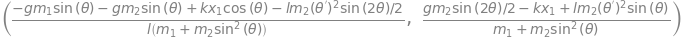

In [100]:
## su codigo aqui 

x1, theta, m1, m2, k, l, g, T, x1dd, x2dd, y2dd, thetad, thetadd = sym.symbols("x_1 theta m_1 m_2 k l g T x_1dd x_2dd y_2dd theta^' theta^'' ")

ec1= m1*x1dd + k*x1 - T*sym.sin(theta)
ec2= m2*x2dd + T*sym.sin(theta)
ec3= m2*y2dd - T*sym.cos(theta) + m2*g
ec4= x2dd - x1dd + pow(thetad,2)*l*sym.sin(theta) - thetadd*l*sym.cos(theta)
ec5=y2dd -pow(thetad,2)*l*sym.cos(theta) - thetadd*l*sym.sin(theta) 

sol= sym.solve([ec1,ec2,ec3,ec4,ec5], [x1dd,x2dd,thetadd,y2dd,T])

(sym.simplify(sol[thetadd]),sym.simplify(sol[x1dd]))




## Problema 3

A partir de las ecuaciones de segundo grado del problema 1, resuelva las ecuaciones diferenciales anteriores, con el método de Runge-Kutta (de 4-to u 8-vo orden) y realice una simulación del movimiento, el resultado esperado debe verse como la siguiente simulación, 

https://www.youtube.com/watch?v=yTXhcYtohvk

Para la simulación use los siguientes parametros:

$l_0 = 1 \text{ m}, \quad l = 1 \text{ m}, \quad m_1 = 8 \text{ kg}, \quad m_2 = 10 \text{ kg}, \quad k = 300 \text{ N/m}, \quad \theta_0= 70^\circ, \quad \omega_0 = 0 \quad T_\text{total} = 5 \text{ s}, \quad x_{10} = 1 \text{ m }$, $dt = 0.005 \text{ s }, v_0 = 0$.

In [81]:
# parámetros del problema
# idealmente no modificar mucho esta parte del codigo para facilitar la evaluacion

g = 9.8 # m/s^2
l = 1 # m longitud del pendulo
m1 = 8 # kg
m2 = 10 # kg
k = 300 # N/m
l0 = 1 # m longitud del resorte sin estirar

tiempo = 5 # s
puntos = int(tiempo*200) # numero de puntos a evaluar en la trayectoria
h=5/200

# condiciones iniciales
theta = 70 * np.pi/180 # angulo inicial respecto a la vertical (rad)
x = 1  # posición inicial con respecto a la longitud del resorte sin estirar
x2 = x + l * np.sin(theta) # posición inicial de la masa 2 con respecto a la longitud del resorte sin estirar
y2 = - l * np.cos(theta) # posición inicial de la masa 2 con respecto a la longitud del resorte sin estirar
v = 0.0 # velocidad angular inicial respecto a la vertical (rad/s)
omega = 0

In [82]:
## su codigo aqui

def domega(omega,theta,x1,v1):
    num=k*x1-m2*pow(omega,2)*l*np.sin(theta)-g*(m1+m2)*np.tan(theta)
    denom=l*(m1+m2)*np.sin(theta)*np.tan(theta)+m1*l*np.cos(theta)
    return num/denom

def dv1(v1,x1,omega,theta):
    num1=-k*x1+m2*pow(omega,2)*l*np.sin(theta)
    num2=m2*(k*x1-m2*pow(omega,2)*l*np.sin(theta)-g*(m1+m2)*np.tan(theta))
    denom1=m1+m2
    denom2=(m1+m2)*(m1*pow(np.tan(theta),2)+m2)
    return num1/denom1 - num2/denom2

#Runge-Kutta 4to orden

X1=[x]
T=[theta]
V1=[0]
Om=[0]

for i in range(0,puntos):
    omega=Om[i]
    theta=T[i]
    x=X1[i]
    v=V1[i]
    x1=x
    v1=v
    #theta
    l1=h*domega(omega,theta,x1,v1)
    k1=h*omega
    k2=h*(omega+0.5*l1)
    l2=h*domega(omega+0.5*l1,theta+0.5*k1,x1,v1)
    k3=h*(omega+0.5*l2)
    l3=h*domega(omega+0.5*l2,theta+0.5*k2,x1,v1)
    k4=h*(omega+l3)
    l4=h*domega(omega+l3,theta+k3,x1,v1)

    T.append(theta+(1/6)*(k1+2*k2+2*k3+k4))
    Om.append(omega+(1/6)*(l1+2*l2+2*l3+l4))

    #x1
    l1=h*dv1(v,x,omega,theta)
    k1=h*v
    k2=h*(v+0.5*l1)
    l2=h*dv1(v+0.5*l1,x+0.5*k1,omega,theta)
    k3=h*(v+0.5*l2)
    l3=h*dv1(v+0.5*l2,x+0.5*k2,omega,theta)
    k4=h*(v+l3)
    l4=h*dv1(v+l3,x+k3,omega,theta)

    X1.append(x+(1/6)*(k1+2*k2+2*k3+k4))
    V1.append(v+(1/6)*(l1+2*l2+2*l3+l4))


#Obtener X2, Y2

X1=np.array(X1)
T=np.array(T)

X2=X1+l*np.sin(T)
Y2=-l*np.cos(T)

Y1=np.array([0]*len(X1))


XX2=[]
YY2=[]
LX1=[]
LY1=[]
LX2=[]
LY2=[]

#Create Lines
for i in range(0,len(X1)):
    x1=X1[i]
    x2=X2[i]
    y1=Y1[i]
    y2=Y2[i]
    m=(y2-y1)/(x2-x1)
    b=y1-m*x1
    e=np.linspace(min(x1,x2),max(x1,x2),10)
    ye=e*m+b
    e=list(e)
    ye=list(ye)
    e2=np.linspace(min(0,x1),max(0,x1),10)
    ye2=[0]*len(e2)
    e2=list(e2)
    LX1.append(e)
    LY1.append(ye)
    LX2.append(e2)
    LY2.append(ye2)
    
data=(X1,Y1,X2,Y2,LX1,LY1,LX2,LY2)


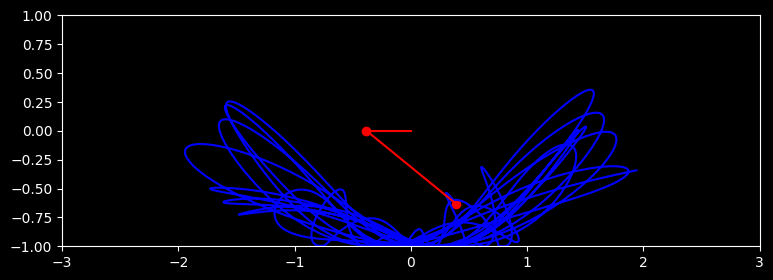

Profe, puede encontrar la simulación entera (3 minutos 20 segundos) en el siguiente link de YouTube:
https://youtu.be/21wfJ9LtGM4

No sabíamos que writer usar para el gif en binder. Usamos imagemagick. En caso de que quiera generar el gif, comente la línea que genera la animación (el return) y descomente las dos línea inferiores a esta. En caso de que no funcione, por favor, cámbielo en el parámetro de la función por el writer que funcione en su computador. 

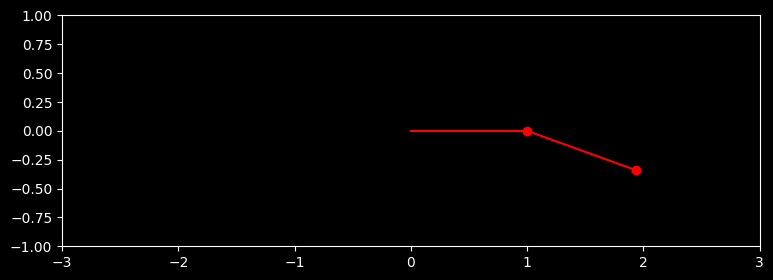

In [110]:
# su simulacion aqui

start_time = time.time()
def crear_animacion(data,filename,writerr):

    X1,Y1,X2,Y2,LX1,LY1,LX2,LY2 = data

    fig, ax = plt.subplots(figsize=(9,3))


    ax.set_xlim(-3,3)
    ax.set_ylim(-1,1)



    def update(i):

        ax.clear()
        ax.set_xlim(-3,3)
        ax.set_ylim(-1,1)
        ax.figsize=(9,1)
        ax.plot(X2[:i],Y2[:i],"blue")
        ax.scatter(X2[i],Y2[i],color="red")
        ax.scatter(X1[i],Y1[i],color="red")
        ax.plot(LX1[i],LY1[i],"red")
        ax.plot(LX2[i],LY2[i],"red")



        

    return ani.FuncAnimation(fig, func = update, frames=range(120))
    
    #anim=ani.FuncAnimation(fig, func = update, frames=range(100))
    #anim.save(filename, writer=writerr)

    

start_time = time.time()
crear_animacion(data,'sistema_resorte_pendulo.gif',"imagemagick")


In [111]:
# use el siguiente codigo para evaluar el tiempo de su simulacion

print("Tiempo usado en crear la animación (s):",time.time() - start_time)

Tiempo usado en crear la animación (s): 19.03326392173767
